In [248]:
import pandas as pd
import operator
import matplotlib.pyplot as plt

In [261]:
def plot_color(dict1):
    print(dict1)
    max_val=max(dict1.items(), key=operator.itemgetter(1))
    color=[]
    for key in dict1:
        if dict1[key] == max_val[1]:
            color.append('r')
        else:
            color.append('b')
    return color
        
    

In [262]:
def bayes_filter(bel_x, z):
    #bel_x=x
    plt.subplot(3,1,1)
    plt.bar(*zip(*bel_x.items()),color=plot_color(bel_x))
    first_grid=.7
    same_grid=.3
    second_grid=0.0
    yellow_grid=0.0
    door=['p1','p3']
    wall=['p0','p2']
    door_sense={"wall_p0":.3,"door_p1":.8,"wall_p2":.3,"door_p3":.8}
    wall_sense={"wall_p0":.7,"door_p1":.2,"wall_p2":.7,"door_p3":.2}
    print(bel_x)
    bel_vals=bel_x.values()
    x_p0=sum([bel*prob for bel,prob in zip(bel_vals,[same_grid,0,0,0])])
   
    x_p1=sum([bel*prob for bel,prob in zip(bel_vals,[first_grid,same_grid,0,0])])
   
    x_p2=sum([bel*prob for bel,prob in zip(bel_vals,[second_grid,first_grid,same_grid,0])])
  
    x_p3=sum([bel*prob for bel,prob in zip(bel_vals,[0,second_grid,first_grid,same_grid])])
   
    bel_bar={"p0":x_p0,"p1":x_p1,"p2":x_p2,"p3":x_p3}
    print("bel_bar: ",bel_bar)

    sum_bel=[]
    
    if z == "door":
        print("If Measurement: ", z)
        plt.subplot(3,1,2)
        plt.bar(*zip(*door_sense.items()),color=plot_color(door_sense))
        for key in bel_bar:
            
            if key in door:
                print("if door: ",key)
                sum_bel.append(bel_bar[key]*.80)
                bel_bar[key]*=.80
                
            else:
                print("else door: ",key)
                sum_bel.append(bel_bar[key]*.30)
                bel_bar[key]*=.30
                
    else:
        plt.subplot(3,1,2)
        plt.bar(*zip(*wall_sense.items()),color=plot_color(wall_sense))
        print("Else Measurement: ", z)
        for key in bel_bar:
            
            if key in wall:
                print("if wall: ",key)
                sum_bel.append(bel_bar[key]*.70)
                bel_bar[key]*=.70
                
            else:
                print("else wall: ",key)
                sum_bel.append(bel_bar[key]*.20)
                bel_bar[key]*=.20
    
    print("sum_bel: ",sum_bel)
                
    eta=1/sum(sum_bel)
    print("eta: ", eta)

   
    new_bel={key:bel_bar[key]*eta for key in bel_x}
    
    plt.show()

    return new_bel

In [263]:
steps=[1,2]

bel_x={"p0":0.25,"p1":0.25,"p2":0.25,"p3":0.25}

{'p0': 0.25, 'p1': 0.25, 'p2': 0.25, 'p3': 0.25}
{'p0': 0.25, 'p1': 0.25, 'p2': 0.25, 'p3': 0.25}
bel_bar:  {'p0': 0.075, 'p1': 0.25, 'p2': 0.25, 'p3': 0.25}
If Measurement:  door
{'wall_p0': 0.3, 'door_p1': 0.8, 'wall_p2': 0.3, 'door_p3': 0.8}
else door:  p0
if door:  p1
else door:  p2
if door:  p3
sum_bel:  [0.0225, 0.2, 0.075, 0.2]
eta:  2.0100502512562812


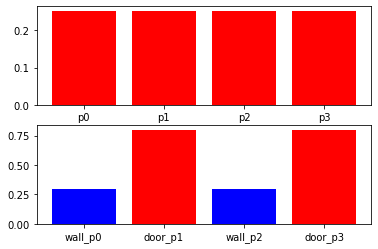

In [264]:
bel_x=bayes_filter(bel_x,"door")

In [265]:
bel_x

{'p0': 0.045226130653266326,
 'p1': 0.40201005025125625,
 'p2': 0.1507537688442211,
 'p3': 0.40201005025125625}

{'p0': 0.045226130653266326, 'p1': 0.40201005025125625, 'p2': 0.1507537688442211, 'p3': 0.40201005025125625}
{'p0': 0.045226130653266326, 'p1': 0.40201005025125625, 'p2': 0.1507537688442211, 'p3': 0.40201005025125625}
bel_bar:  {'p0': 0.013567839195979897, 'p1': 0.1522613065326633, 'p2': 0.32663316582914564, 'p3': 0.22613065326633164}
{'wall_p0': 0.7, 'door_p1': 0.2, 'wall_p2': 0.7, 'door_p3': 0.2}
Else Measurement:  wall
if wall:  p0
else wall:  p1
if wall:  p2
else wall:  p3
sum_bel:  [0.009497487437185927, 0.030452261306532658, 0.22864321608040195, 0.04522613065326633]
eta:  3.186549239391514


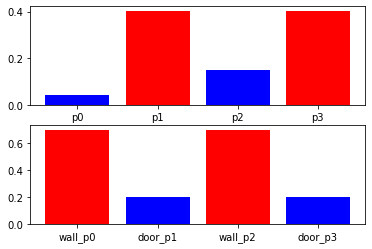

{'p0': 0.030264211369095274,
 'p1': 0.09703763010408327,
 'p2': 0.7285828662930344,
 'p3': 0.14411529223378708}

In [266]:
bayes_filter(bel_x,"wall")